In [11]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.special
import scipy.stats as stats


Populating the interactive namespace from numpy and matplotlib


# Question 1
Recall the globe tossing model from chapter 2.

# A
Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for $p$.
  1. W,W,W
  2. W,W,W,L
  3. L,W,W,L,W,W,W

# B
Now assume a prior for $p$ that is equal to zero when $p < 0.5$ and is a positive constant when $p \geq 0.5$. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

# C
Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes (you don't know which) was tossed in the air and produced a "land" observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing "land" (${\rm Pr}(\text{Earth} | \text{land})$), is 0.23.

Text(0.5, 1.0, 'WWW')

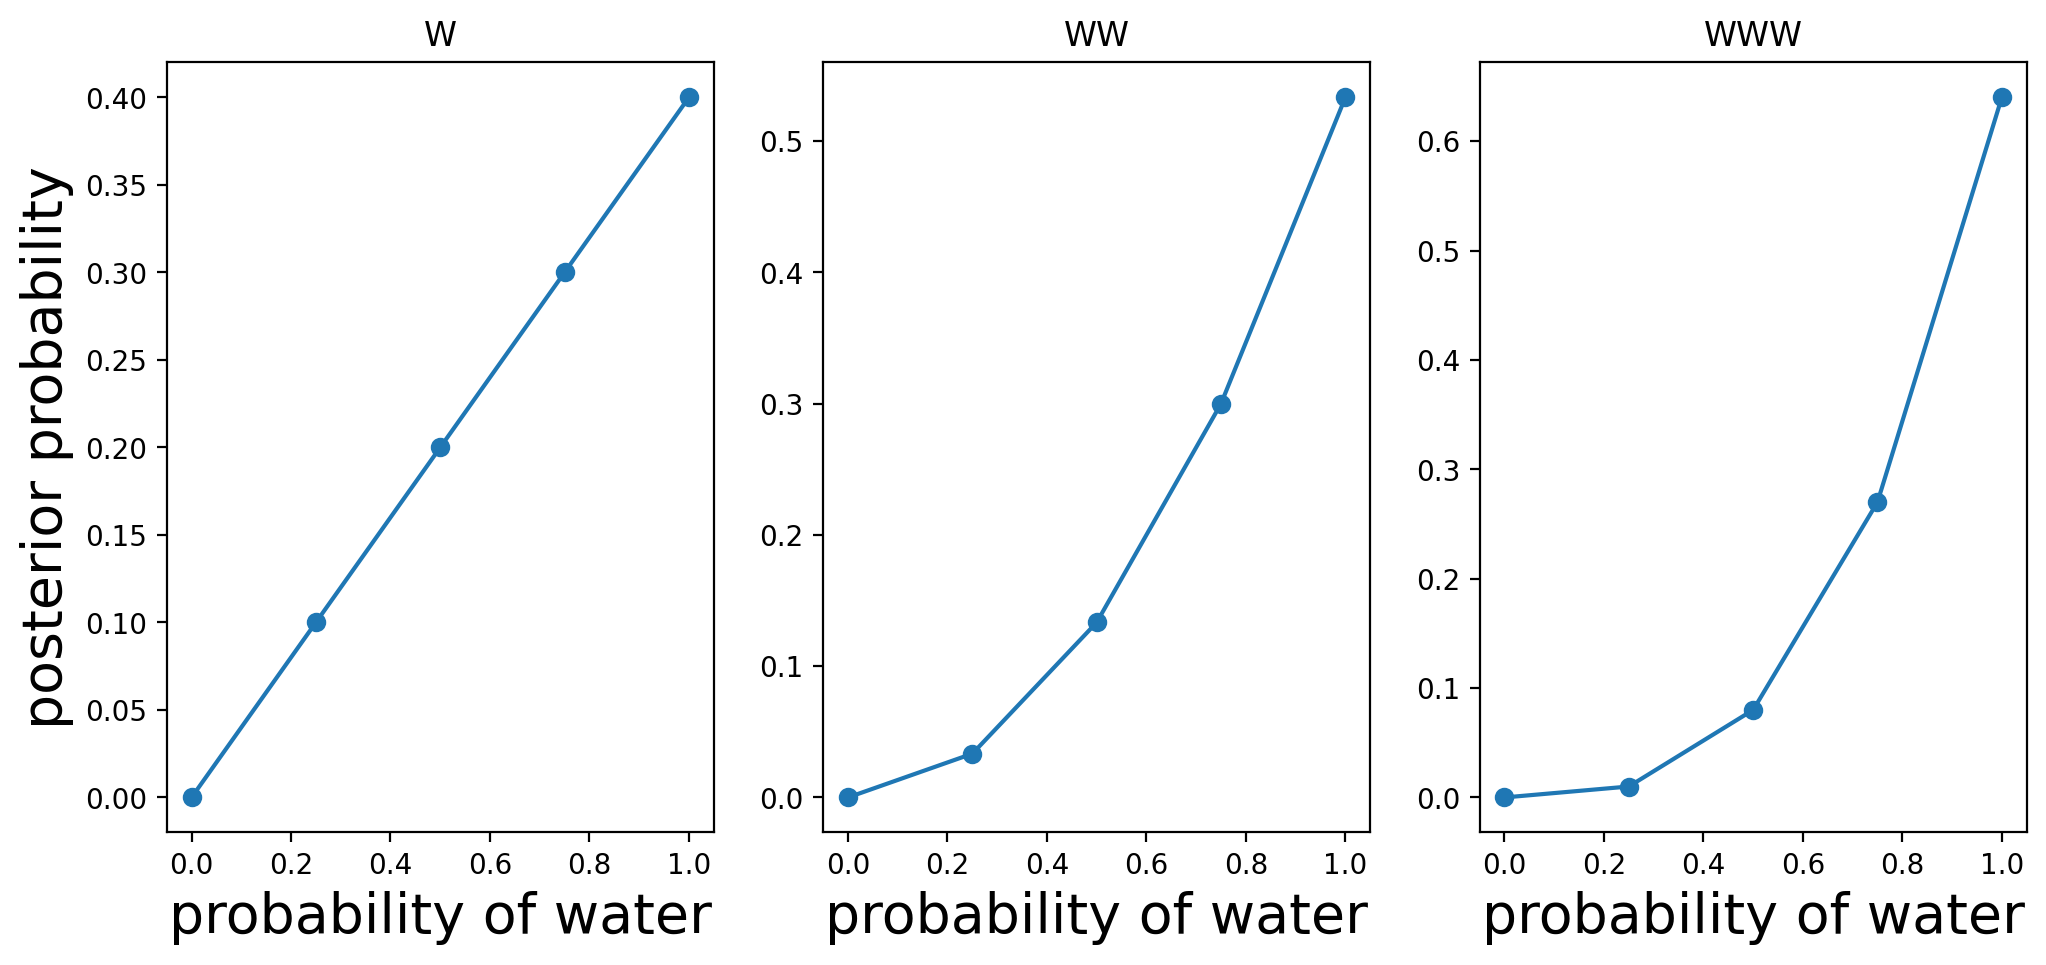

In [85]:
#Used GPT to figure out these libraries were missing in class notes and returning name error
import numpy as np
import matplotlib.pyplot as plt

#Grid creation from notes
def posterior_grid_approx(grid_points, success, tosses):
    ## define grid
    p_grid = linspace(0, 1, grid_points)

    ## define prior
    prior = ones_like(p_grid) ## an array of ones the same size and shape as `p_grid`
    # prior = int64(p_grid >= 0.5)
    # prior = exp(- 5 * absolute(p_grid - 0.5))  # double exp

    ## compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    ## compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    ## standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

#Case 1
w = 1
n = 1
fig = figure(1, [12, 5])

fig.add_subplot(1,3,1)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
xlabel("probability of water", fontsize=20)
ylabel("posterior probability", fontsize=20)
title('W')


w = 2
n = 2

fig.add_subplot(1,3,2)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
xlabel("probability of water", fontsize=20)
title('WW')


w = 3
n = 3



fig.add_subplot(1,3,3)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
xlabel("probability of water", fontsize=20)
title('WWW')

Text(0.5, 0.02, 'Probability of water')

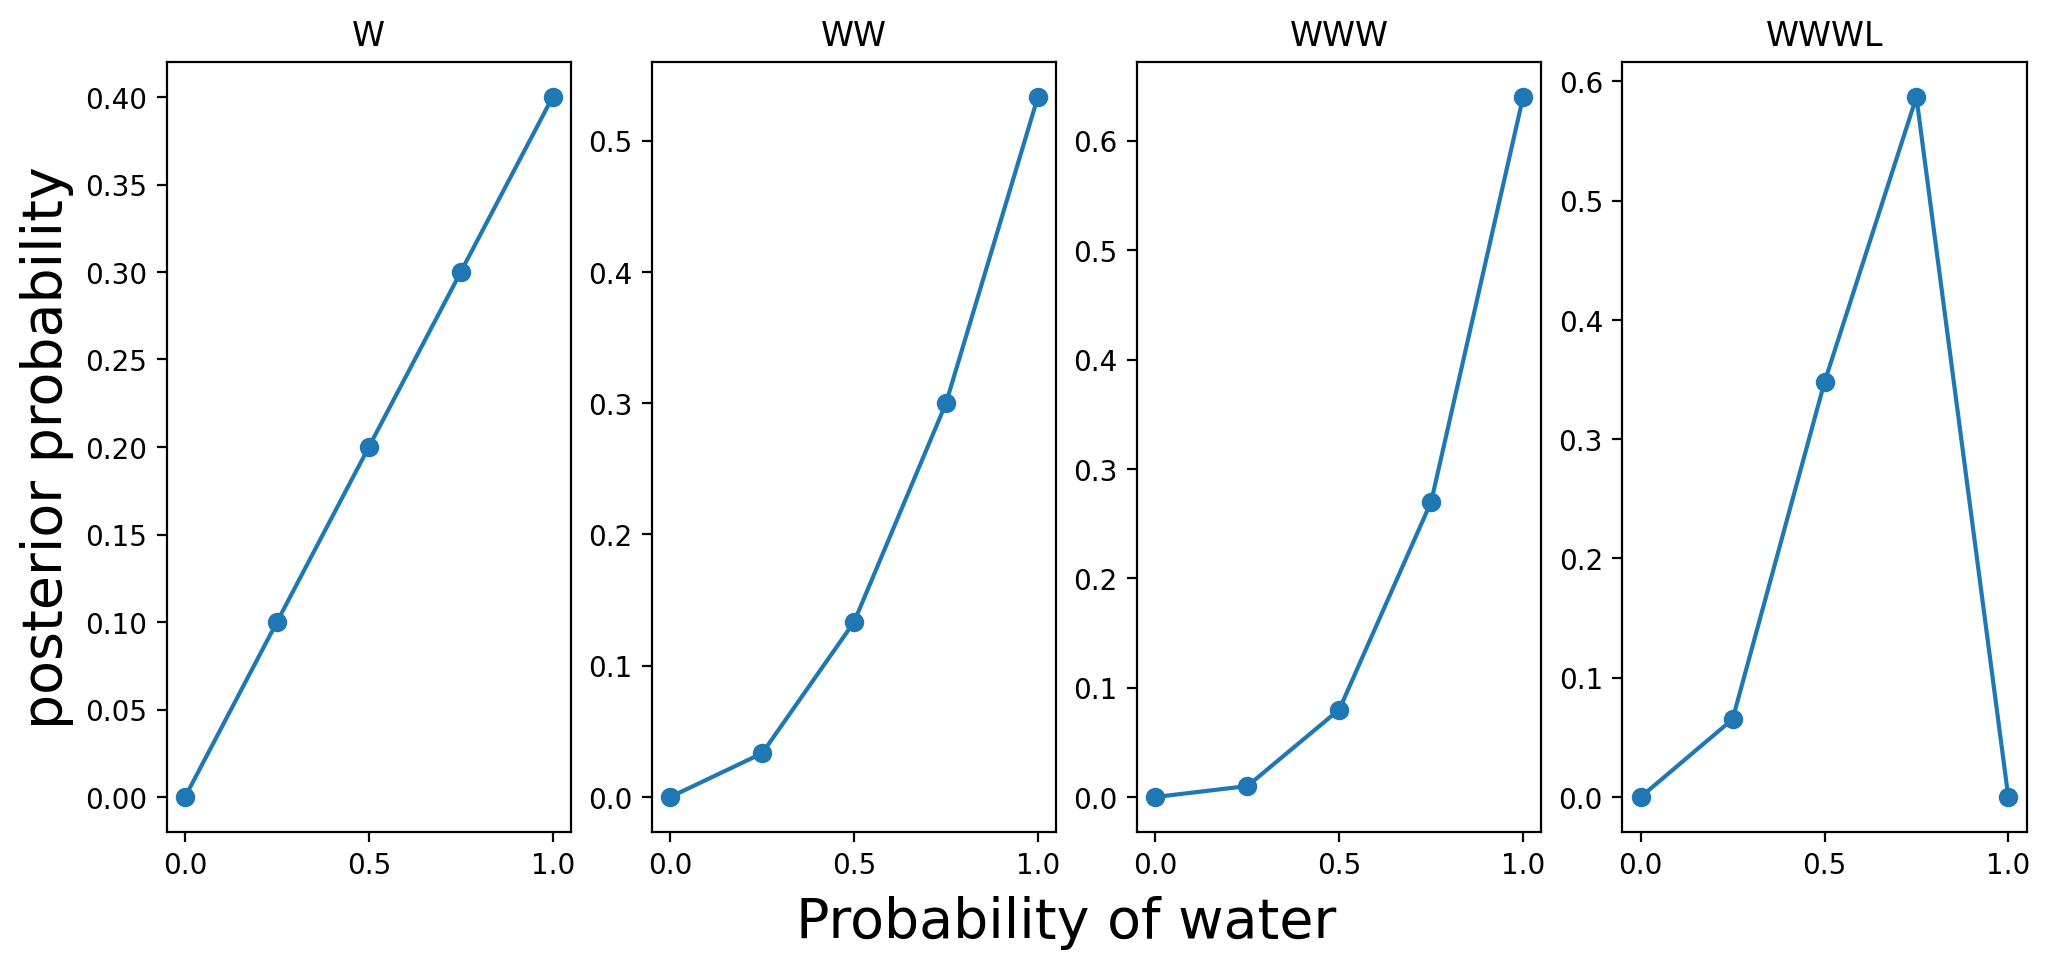

In [106]:
#Case 2
w = 1
n = 1
fig = figure(1, [12, 5])
fig.add_subplot(1,4,1)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
ylabel("posterior probability", fontsize=20)
title('W')


w = 2
n = 2

fig.add_subplot(1,4,2)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('WW')


w = 3
n = 3



fig.add_subplot(1,4,3)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('WWW')


w = 3
n = 4

fig.add_subplot(1,4,4)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('WWWL', )



fig.text(0.5, 0.02, "Probability of water", ha='center', va='center', fontsize=20)


Text(0.02, 0.5, 'posterior probability')

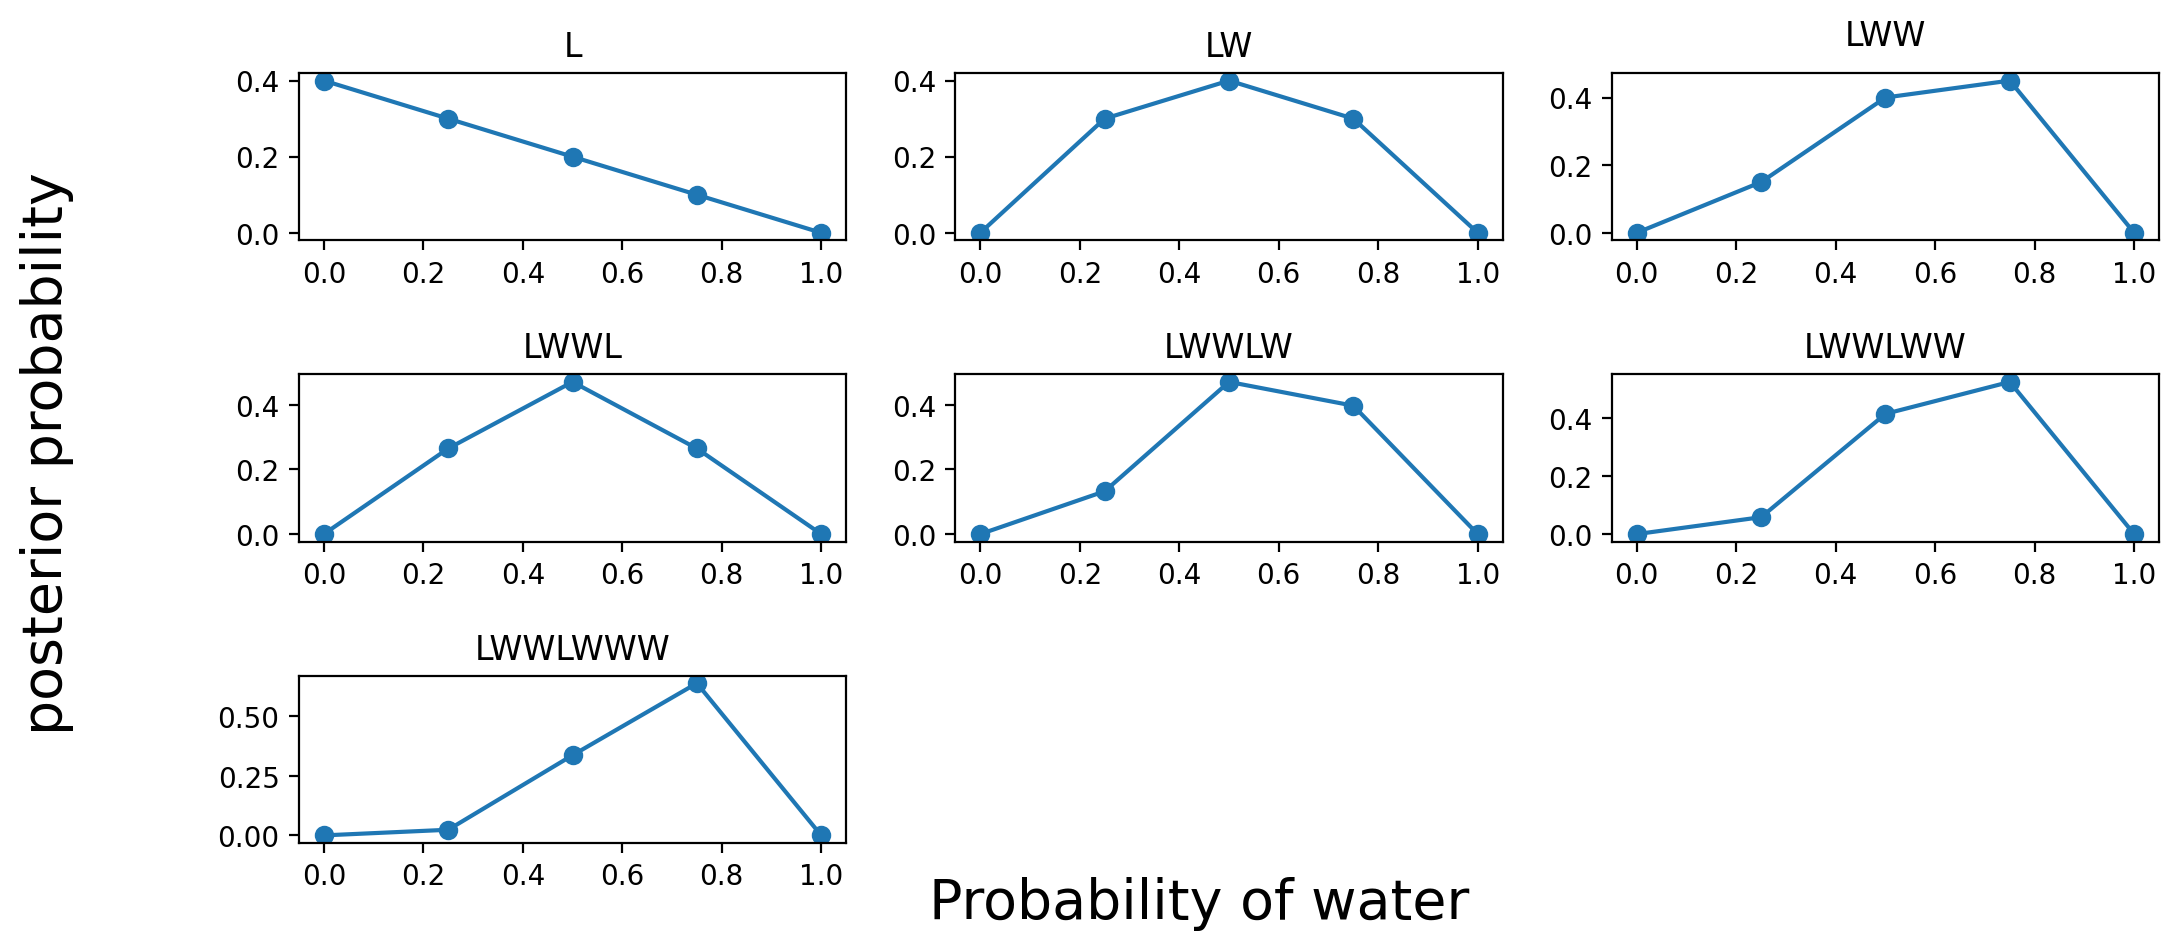

In [112]:
#Case 3
w = 0
n = 1
fig = figure(1, [12, 5])
plt.subplots_adjust(hspace=0.8)
fig.add_subplot(3,3,1)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
#ylabel("posterior probability", fontsize=20)
title('L')


w = 1
n = 2

fig.add_subplot(3,3,2)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('LW')


w = 2
n = 3



fig.add_subplot(3,3,3)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('LWW', pad=10)


w = 2
n = 4

fig.add_subplot(3,3,4)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('LWWL')


w = 3
n = 5

fig.add_subplot(3,3,5)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('LWWLW')


w = 4
n = 6

fig.add_subplot(3,3,6)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('LWWLWW')



w = 5
n = 7

fig.add_subplot(3,3,7)
p_grid, posterior = posterior_grid_approx(5, w, n)
plot(p_grid, posterior, "o-")
#xlabel("probability of water", fontsize=20)
title('LWWLWWW',)


fig.text(0.5, 0.05, "Probability of water", ha='center', va='center', fontsize=20)
fig.text(0.02, 0.5, "posterior probability", ha='center', va='center',rotation = 'vertical', fontsize=20)


# Question 2
Suppose that in a certain region there are two species of polar bear (the two species cannot interbreed). Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic test capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 8% of the time, otherwise birthing a single infant. Species B births twins 19% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

# A
Now suppose you are managing a captive polar bear breeding program. You have a new female bear of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

# B
Now compute the probability that the bear we have is from species A, assuming we have observed only the first birth and that it was twins.

# C
suppose the same mother bear mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that she is species A.
